# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df = pd.read_csv("/content/garisKemiskinan.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
## a. Memahami Struktur Data
display(df.head())
display(df.info())
display(df.describe())


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


None

,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


In [6]:
## b. Menangani Data yang Hilang
display(df.isnull().sum())

,0
provinsi,0
jenis,0
daerah,0
tahun,0
periode,0
gk,199


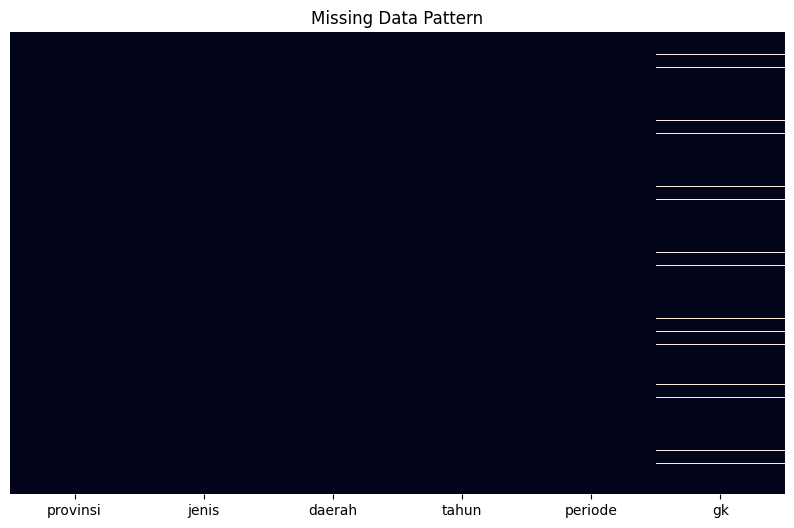

In [7]:
# Visualize missing data pattern before dropping
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Pattern")
plt.show()

df.dropna(inplace=True)  # Menghapus baris dengan nilai kosong

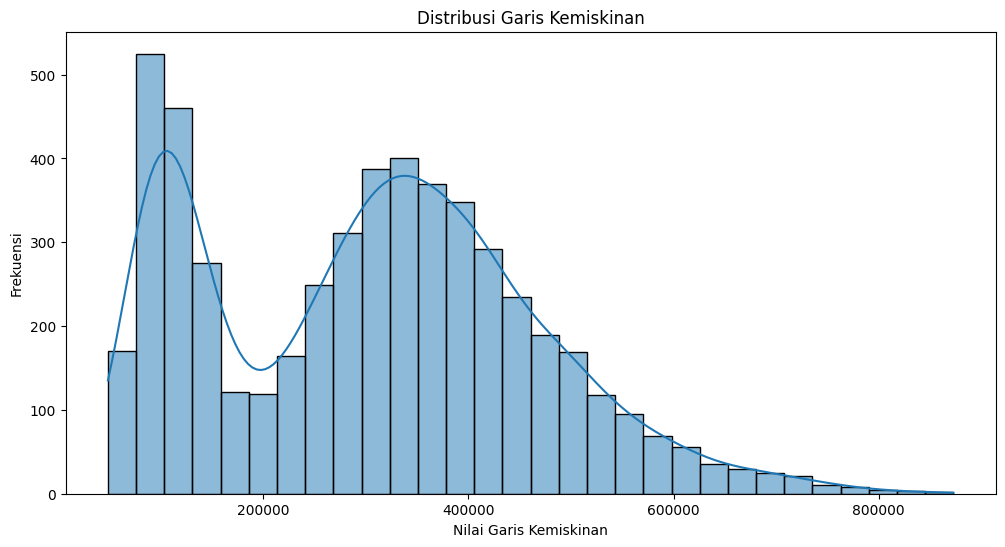

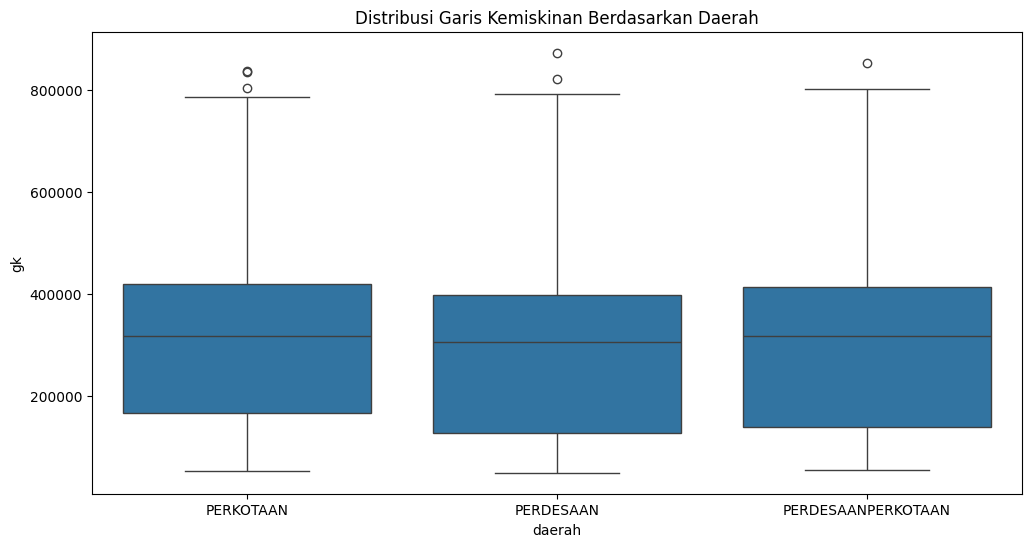

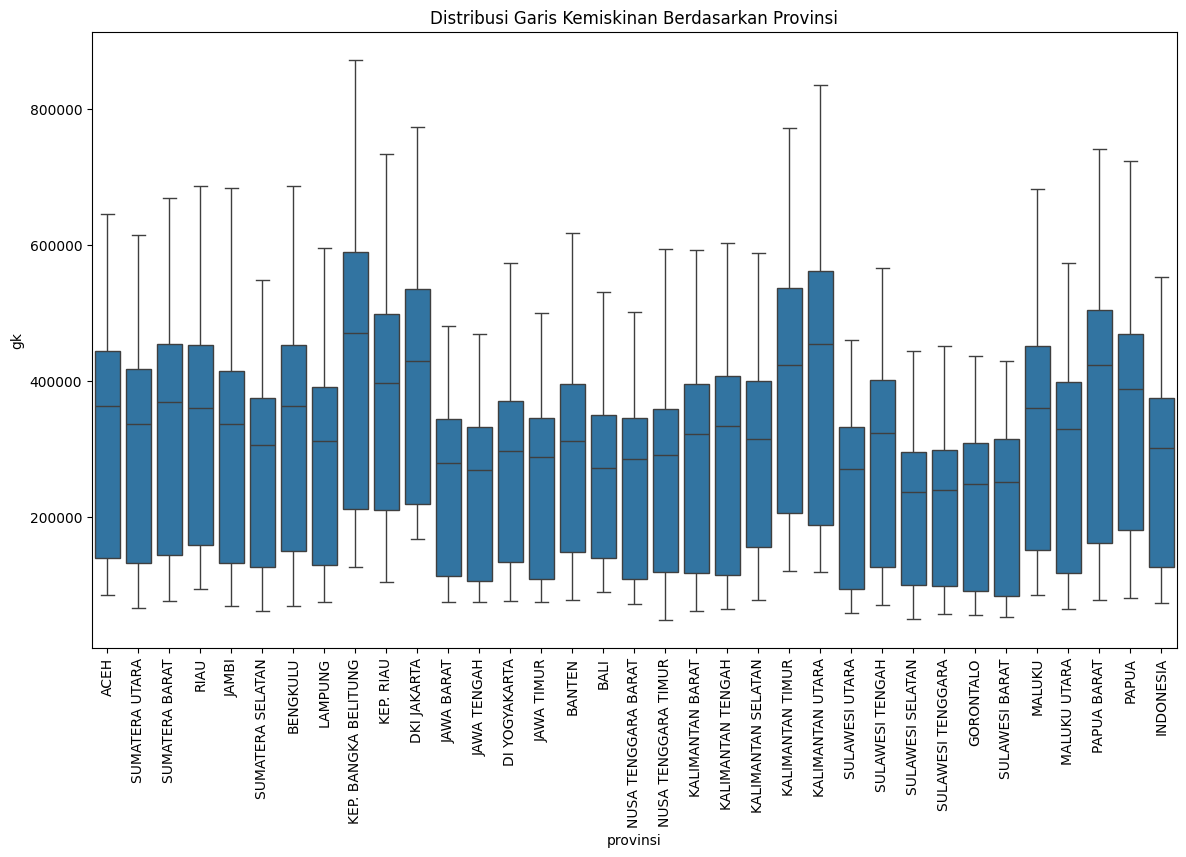

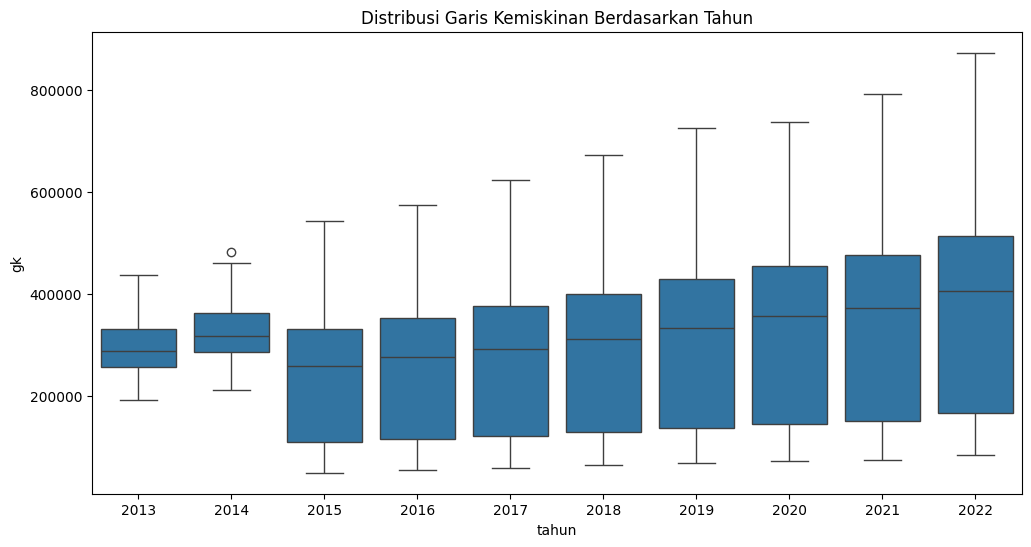

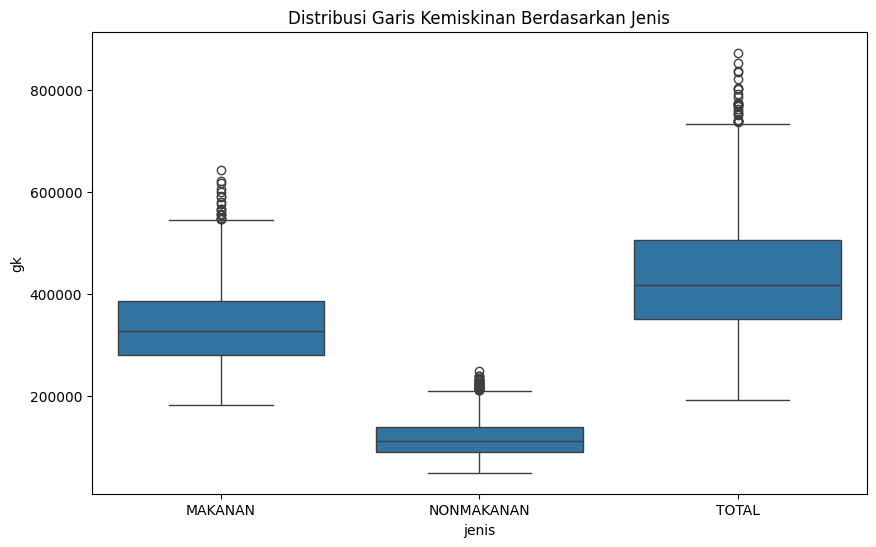

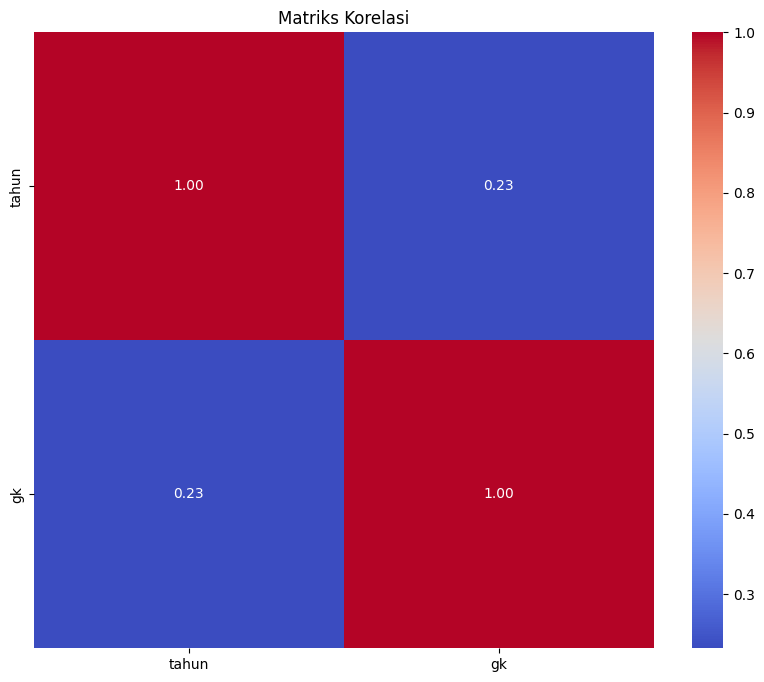

In [8]:
## c. Analisis Distribusi dan Korelasi
plt.figure(figsize=(12,6))
sns.histplot(df['gk'], bins=30, kde=True)
plt.title("Distribusi Garis Kemiskinan")
plt.xlabel("Nilai Garis Kemiskinan")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='daerah', y='gk', data=df)
plt.title("Distribusi Garis Kemiskinan Berdasarkan Daerah")
plt.show()

# Examine distribution by province
plt.figure(figsize=(14,8))
sns.boxplot(x='provinsi', y='gk', data=df)
plt.title("Distribusi Garis Kemiskinan Berdasarkan Provinsi")
plt.xticks(rotation=90)
plt.show()

# Distribution by year
plt.figure(figsize=(12,6))
sns.boxplot(x='tahun', y='gk', data=df)
plt.title("Distribusi Garis Kemiskinan Berdasarkan Tahun")
plt.show()

# Distribution by type
plt.figure(figsize=(10,6))
sns.boxplot(x='jenis', y='gk', data=df)
plt.title("Distribusi Garis Kemiskinan Berdasarkan Jenis")
plt.show()

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [9]:
# Data Preprocessing
## a. Encoding Data Kategorikal - Use separate encoder for each column
df['provinsi_encoded'] = LabelEncoder().fit_transform(df['provinsi'])
df['jenis_encoded'] = LabelEncoder().fit_transform(df['jenis'])
df['daerah_encoded'] = LabelEncoder().fit_transform(df['daerah'])
df['periode_encoded'] = LabelEncoder().fit_transform(df['periode'])

# Keep original columns for interpretation
df_encoded = df.copy()
features_for_clustering = ['provinsi_encoded', 'jenis_encoded', 'daerah_encoded',
                          'tahun', 'periode_encoded', 'gk']

In [10]:
## b. Normalisasi Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_for_clustering])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

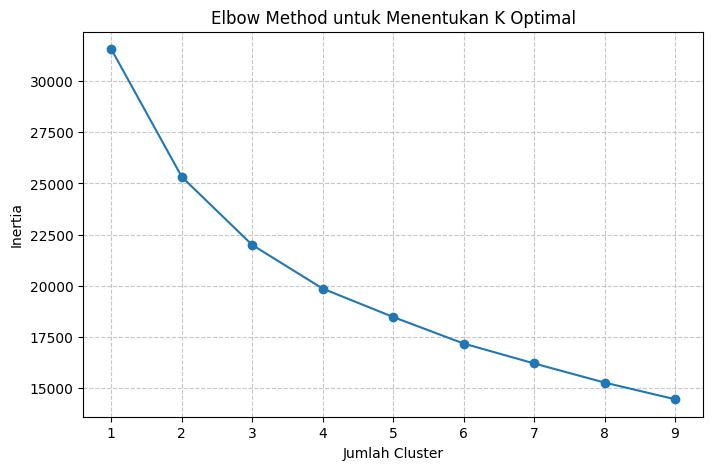

In [11]:
## a. Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

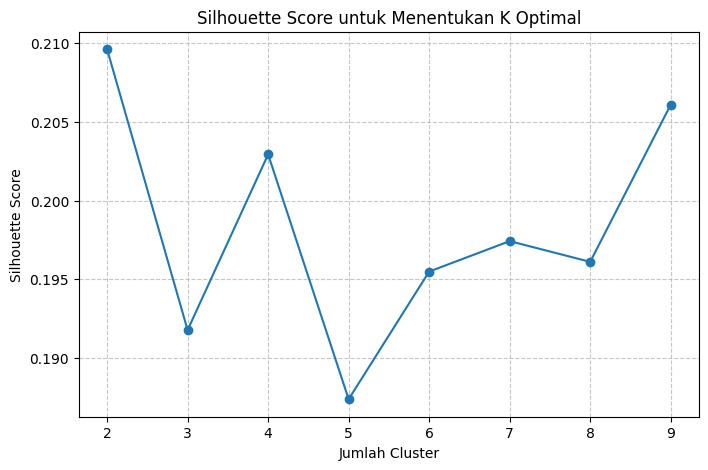

In [12]:
## b. Evaluasi Model Clustering dengan Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan K Optimal")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [13]:
## c. Clustering dengan K-Means
optimal_k = 3  # Hasil dari Elbow dan Silhouette Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

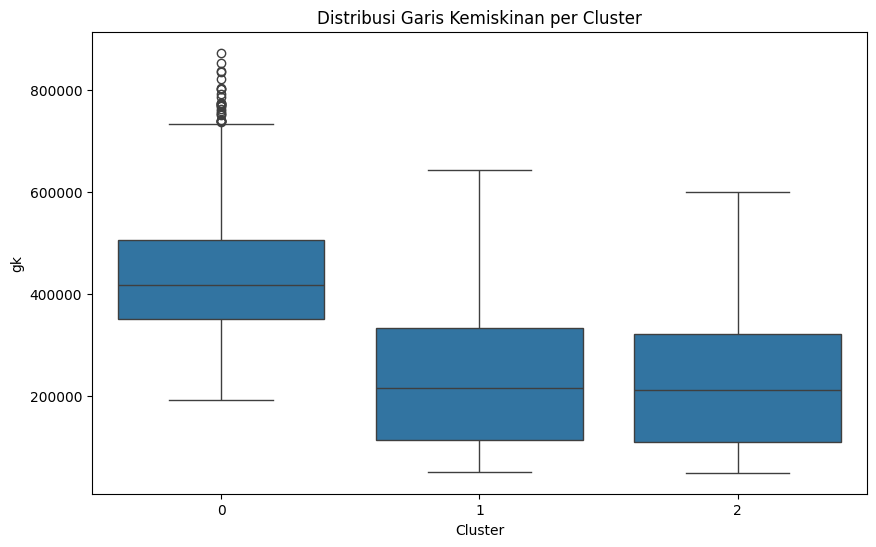

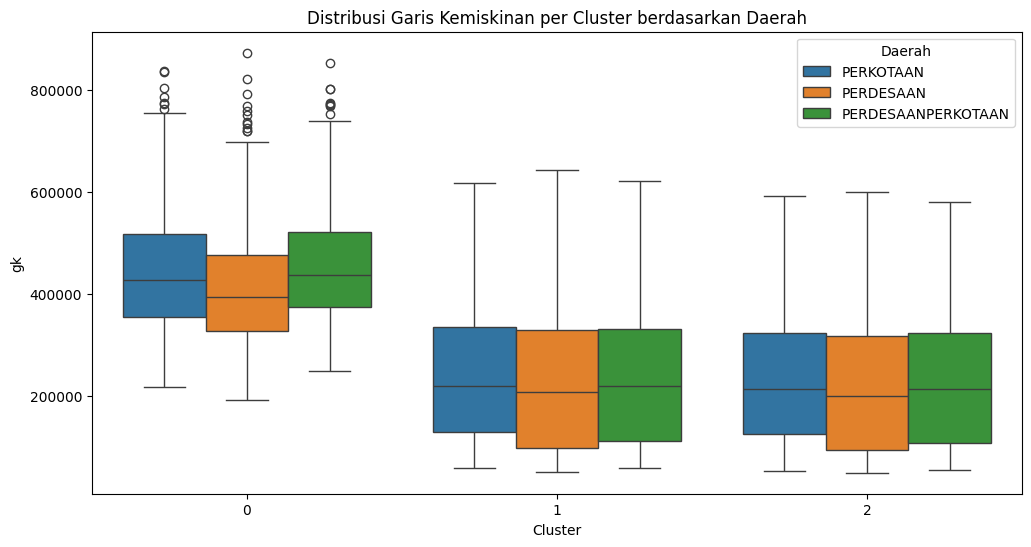

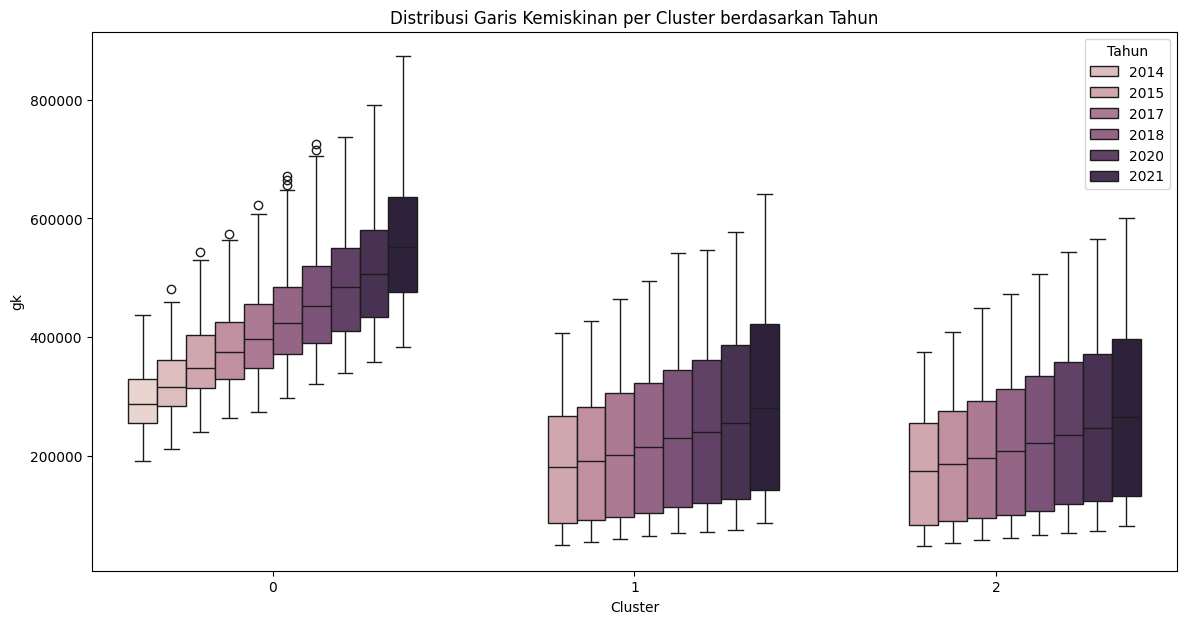

In [14]:
## d. Visualisasi Hasil Clustering
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='gk', data=df_encoded)
plt.title("Distribusi Garis Kemiskinan per Cluster")
plt.show()

# Boxplot for clusters by region
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='gk', hue='daerah', data=df_encoded)
plt.title("Distribusi Garis Kemiskinan per Cluster berdasarkan Daerah")
plt.legend(title='Daerah')
plt.show()

# Boxplot for clusters by year
plt.figure(figsize=(14,7))
sns.boxplot(x='Cluster', y='gk', hue='tahun', data=df_encoded)
plt.title("Distribusi Garis Kemiskinan per Cluster berdasarkan Tahun")
plt.legend(title='Tahun')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

,provinsi_encoded,jenis_encoded,daerah_encoded,tahun,periode_encoded,gk
Cluster,,,,,,
0,17.122090,2.0,1.009829,2017.803932,0.500259,435257.475944
1,17.115385,0.5,1.009615,2018.500000,1.000000,231435.368990
2,17.115385,0.5,1.009615,2018.500000,0.000000,223785.315505


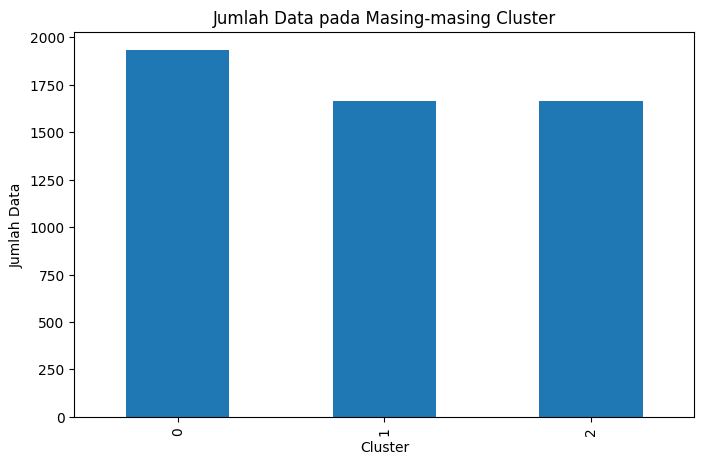

daerah,PERDESAAN,PERDESAANPERKOTAAN,PERKOTAAN
Cluster,,,
0,677,560,696
1,544,560,560
2,544,560,560


Cluster,0,1,2
provinsi,,,
ACEH,56,48,48
BALI,56,48,48
BANTEN,56,48,48
BENGKULU,56,48,48
DI YOGYAKARTA,56,48,48
DKI JAKARTA,37,32,32
GORONTALO,56,48,48
INDONESIA,56,48,48
JAMBI,56,48,48


tahun,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cluster,,,,,,,,,,
0,135,134,208,208,208,208,208,208,208,208
1,0,0,208,208,208,208,208,208,208,208
2,0,0,208,208,208,208,208,208,208,208


,provinsi_encoded,jenis_encoded,daerah_encoded,tahun,periode_encoded,gk
0,17.122090,2.0,1.009829,2017.803932,5.002587e-01,435257.475944
1,17.115385,0.5,1.009615,2018.500000,1.000000e+00,231435.368990
2,17.115385,0.5,1.009615,2018.500000,1.543210e-14,223785.315505


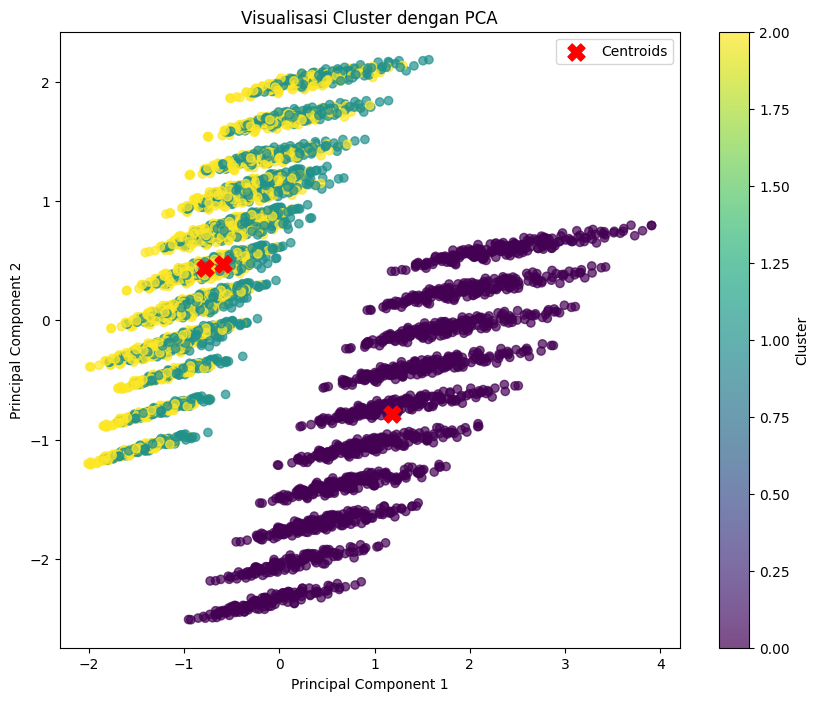

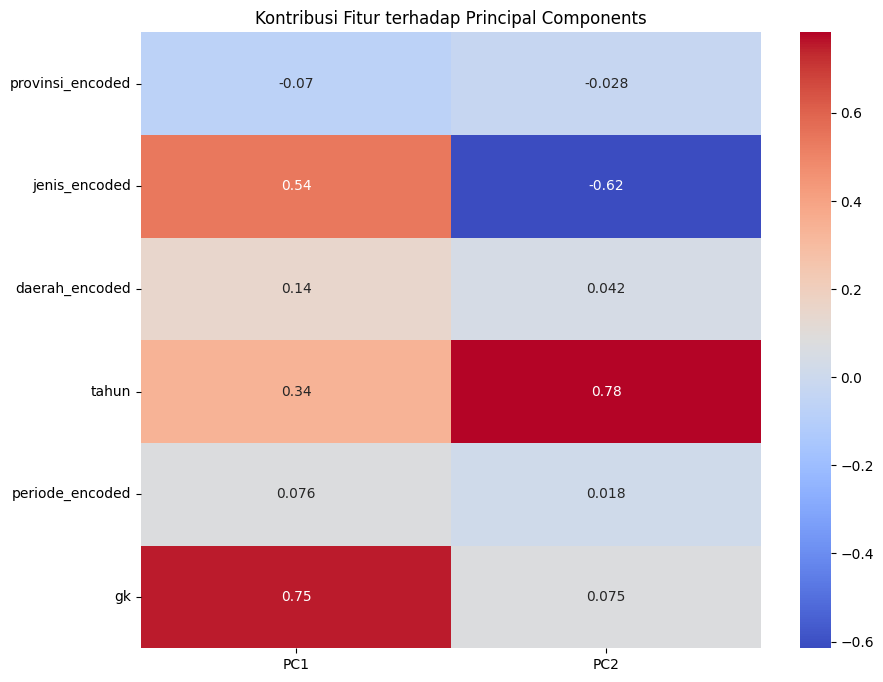

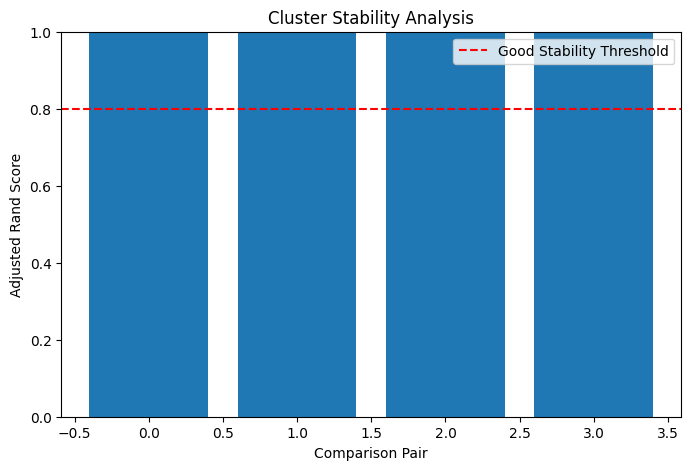

gk                                              provinsi  \
                  mean    median       min       max            std <lambda>   
Cluster                                                                        
0        435257.475944  417828.0  192161.0  872843.0  116396.154903     ACEH   
1        231435.368990  215663.5   50261.0  641806.0  128040.640895     ACEH   
2        223785.315505  211192.0   48561.0  600254.0  123569.628669     ACEH   

            daerah        tahun              
          <lambda>         mean   min   max  
Cluster                                      
0        PERKOTAAN  2017.803932  2013  2022  
1        PERKOTAAN  2018.500000  2015  2022  
2        PERKOTAAN  2018.500000  2015  2022

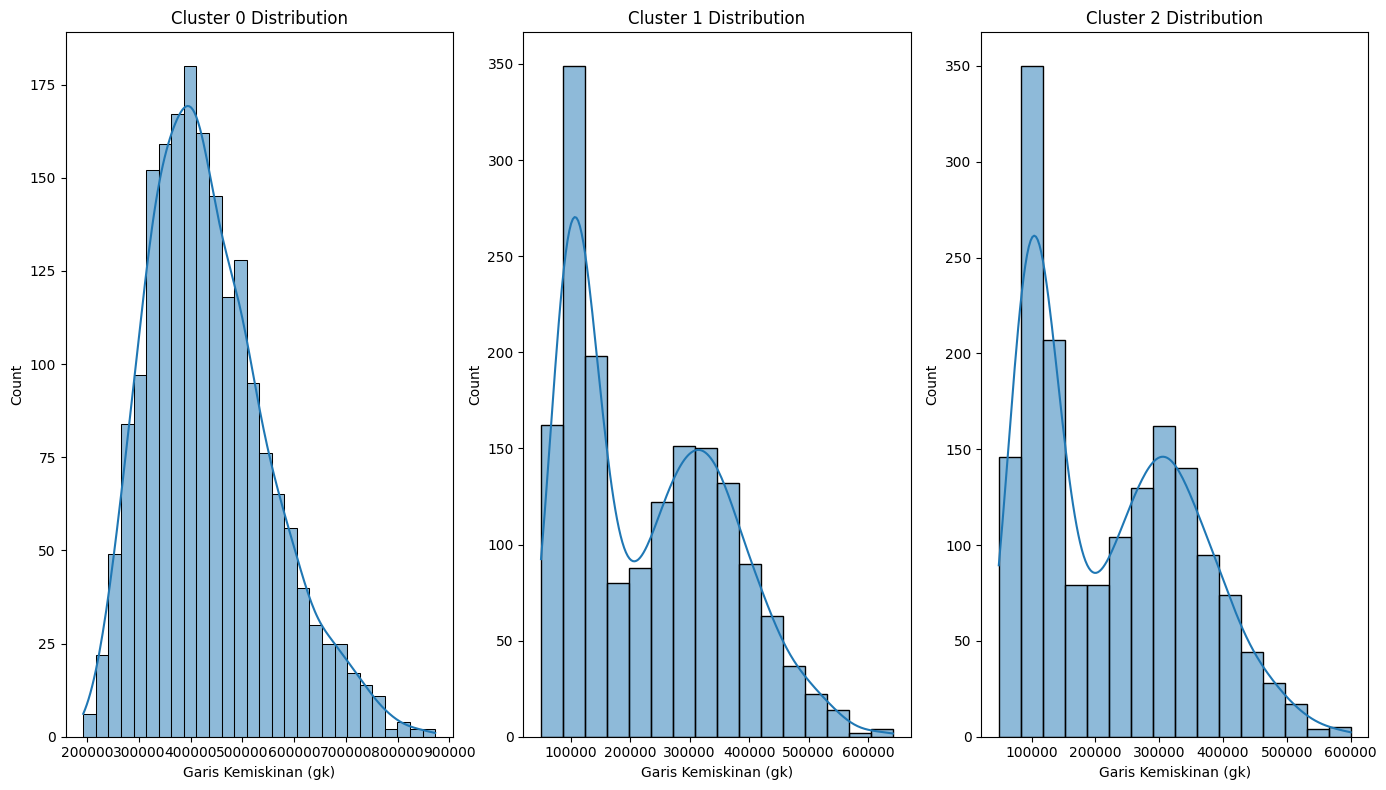

In [15]:
## e. Analisis dan Interpretasi Hasil Cluster
display(df_encoded.groupby('Cluster')[['provinsi_encoded', 'jenis_encoded', 'daerah_encoded',
                                      'tahun', 'periode_encoded', 'gk']].mean())

# Analyze count of instances in each cluster
cluster_counts = df_encoded['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar')
plt.title('Jumlah Data pada Masing-masing Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

# Cross-tabulation analysis by region
display(pd.crosstab(df_encoded['Cluster'], df_encoded['daerah']))

# Cross-tabulation analysis by province
province_cluster = pd.crosstab(df_encoded['provinsi'], df_encoded['Cluster'])
display(province_cluster)

# Cross-tabulation analysis by year
display(pd.crosstab(df_encoded['Cluster'], df_encoded['tahun']))

# Analyze feature importance to clusters
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features_for_clustering
)
display(cluster_centers)

# PCA visualization for clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
scatter = plt.scatter(principal_components[:,0], principal_components[:,1],
             c=df_encoded['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Cluster dengan PCA')
plt.colorbar(scatter, label='Cluster')

# Add centroids to the plot
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=150, c='red', label='Centroids')
plt.legend()
plt.show()

# Analyze feature contribution to PCA components
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features_for_clustering
)
plt.figure(figsize=(10,8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm')
plt.title('Kontribusi Fitur terhadap Principal Components')
plt.show()

# Check stability of clusters with different random states
cluster_stability = pd.DataFrame()
for i in range(5):
    kmeans_test = KMeans(n_clusters=optimal_k, random_state=i, n_init=10)
    cluster_stability[f'random_state_{i}'] = kmeans_test.fit_predict(df_scaled)

# Calculate agreement between different runs
from sklearn.metrics import adjusted_rand_score
stability_scores = []
for i in range(4):
    score = adjusted_rand_score(
        cluster_stability[f'random_state_{i}'],
        cluster_stability[f'random_state_{i+1}']
    )
    stability_scores.append(score)

plt.figure(figsize=(8,5))
plt.bar(range(len(stability_scores)), stability_scores)
plt.axhline(y=0.8, color='r', linestyle='--', label='Good Stability Threshold')
plt.xlabel('Comparison Pair')
plt.ylabel('Adjusted Rand Score')
plt.title('Cluster Stability Analysis')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Summary statistics for each cluster
cluster_summary = df_encoded.groupby('Cluster').agg({
    'gk': ['mean', 'median', 'min', 'max', 'std'],
    'provinsi': lambda x: x.value_counts().index[0],  # Most common province
    'daerah': lambda x: x.value_counts().index[0],    # Most common region
    'tahun': ['mean', 'min', 'max']
})
display(cluster_summary)

# Visualization of cluster distributions
plt.figure(figsize=(14,8))
for i in range(optimal_k):
    plt.subplot(1, optimal_k, i+1)
    cluster_data = df_encoded[df_encoded['Cluster'] == i]['gk']
    sns.histplot(cluster_data, kde=True)
    plt.title(f'Cluster {i} Distribution')
    plt.xlabel('Garis Kemiskinan (gk)')
plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Rata-rata Garis Kemiskinan: 435.257 rupiah
- Rentang Garis Kemiskinan: 192.161 - 872.843 rupiah
- Distribusi: Distribusi normal dengan rata-rata yang tinggi
- Analisis: Cluster ini mencakup wilayah dengan garis kemiskinan tertinggi, yang berarti biaya hidup minimal di daerah ini jauh lebih tinggi dibandingkan cluster lainnya. Kemungkinan ini mewakili daerah perkotaan di provinsi-provinsi dengan biaya hidup tinggi. Meskipun disebut sebagai garis “kemiskinan”, nilai yang tinggi ini menunjukkan standar hidup minimal yang lebih mahal, bukan tingkat kemiskinan yang lebih parah. Fokus kebijakan untuk klaster ini mungkin perlu diarahkan pada peningkatan daya beli dan mengatasi kesenjangan ekonomi yang tinggi.

## Cluster 1:
- Rata-rata Garis Kemiskinan: 231.435 rupiah
- Rentang Garis Kemiskinan: 50.261 - 641.806 rupiah
- Distribusi: Bimodal (dua puncak) dengan konsentrasi di 100,000 dan 300,000-400,000 rupiah
- Analisis: Cluster ini menunjukkan wilayah dengan garis kemiskinan menengah, namun distribusi bimodal menunjukkan adanya dua kelompok yang berbeda dalam cluster ini. Kelompok pertama mungkin mewakili daerah pinggiran kota, sementara kelompok kedua mungkin mewakili daerah perkotaan kecil. Distribusi yang terbelah ini menunjukkan perlunya pendekatan kebijakan yang lebih spesifik dan terfokus berdasarkan sub-kelompok dalam cluster ini.

## Cluster 2:
- Rata-rata Garis Kemiskinan: 223.785 rupiah
- Rentang Garis Kemiskinan: 48.561 - 600.254 rupiah
- Distribusi: Bimodal (dua puncak) dengan pola hampir mirip Cluster 1
- Analisis: Cluster ini memiliki karakteristik yang mirip dengan Cluster 1, namun dengan rata-rata garis kemiskinan yang sedikit lebih rendah. Pola bimodal yang serupa menunjukkan adanya sub-kelompok dalam cluster ini. Hal ini mungkin menandakan suatu wilayah dengan tingkat pembangunan ekonomi yang serupa tetapi dengan karakteristik demografi atau geografis yang berbeda. Kebijakan intervensi untuk cluster ini perlu mempertimbangkan keragaman kondisi ekonomi dalam cluster yang sama.


## Analisis Keseluruhan:
Tiga cluster yang teridentifikasi menunjukkan perbedaan signifikan dalam standar garis kemiskinan di Indonesia, namun menariknya semua cluster menunjukkan ACEH dan daerah PERKOTAAN sebagai lokasi dominan. Hal ini mengindikasikan bahwa perbedaan garis kemiskinan mungkin lebih dipengaruhi oleh faktor-faktor mikroekonomi seperti inflasi faktor lokal atau struktur ekonomi daripada geografis. Distribusi bimodal pada Cluster 1 dan 2 menunjukkan adanya ketimpangan ekonomi bahkan dalam wilayah geografis yang sama, yang memerlukan strategi pengentasan kemiskinan yang lebih terpersonalisasi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [18]:
output_file = 'hasil_clusteringV2.csv'
df_encoded.to_csv(output_file, index=False)  # Menyimpan df_encoded ke CSV
print(f"Dataset telah berhasil disimpan ke file: {output_file}")

# Unduh file CSV menggunakan files.download
from google.colab import files
files.download(output_file)

Dataset telah berhasil disimpan ke file: hasil_clusteringV2.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>